In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from classes.VillaData import getVillaData, getVillaDataRaw, trainModel, testModel, saveModel, loadModel

In [2]:
data = getVillaData()
data.describe()

Cleaning data
[{'name': 'Tag', 'uniques': ['Andet materiale', 'Betontagsten', 'Fibercement herunder asbest', 'Fibercement uden asbest', 'Glas', 'Levende tage', 'Metal', 'Plastmaterialer', 'Stråtag', 'Tagpap med lille hældning', 'Tagpap med stor hældning', 'Tegl']}, {'name': 'Energimærke', 'uniques': ['A', 'A1', 'A10', 'A15', 'A2', 'A20', 'B', 'C', 'D', 'E', 'F', 'G']}, {'name': 'Varmeinstallation', 'uniques': ['Blandet', 'Centralvarme med to fyringsenheder', 'Centralvarme med én fyringsenhed', 'Elvarme', 'Fjernvarme blokvarme', 'Ingen varmeinstallation', 'Ovn til fast og flydende brændsel', 'Varmepumpe']}, {'name': 'Ydervæg', 'uniques': ['Andet materiale', 'Betonelementer', 'Bindingsværk', 'Fibercement herunder asbest', 'Fibercement uden asbest', 'Glas', 'Letbetonsten', 'Metal', 'Mursten', 'Plastmaterialer', 'Træ']}]


Adresse    Year build          Pris   Energimærke    Ejerudgift  \
count  17430.000000  17430.000000  1.743000e+04  17430.000000  17430.000000   
mean    6828.615491   1954.386919  1.914909e+06      7.852324   2222.700803   
std     2067.957408     33.257255  1.212598e+06      1.563539    914.488798   
min     2005.000000   1852.000000  1.450000e+05      0.000000      0.000000   
25%     5200.000000   1932.000000  9.950000e+05      7.000000   1578.000000   
50%     6955.000000   1962.000000  1.595000e+06      8.000000   2040.000000   
75%     8700.000000   1974.000000  2.495000e+06      9.000000   2634.000000   
max     9990.000000   2019.000000  5.999000e+06     11.000000   9074.000000   

        Enhedsareal      Værelser  Antal toiletter  Antal badeværelser  \
count  17430.000000  17430.000000     17430.000000        17430.000000   
mean     148.325531      4.874986         1.625186            1.330809   
std       41.659617      1.393216         0.588993            0.525038   
min        0.000000      0.000000         0.000000            0.000000   
25%      120.000000      4.000000         1.000000            1.000000   
50%      145.000000      5.000000         2.000000            1.000000   
75%      173.000000      6.000000         2.000000            2.000000   
max      299.000000      9.000000         3.000000            3.000000   

            Ydervæg           Tag        Etager  Seneste ombygning  \
count  17430.000000  17430.000000  17430.000000       17430.000000   
mean       7.837751      4.699369      1.027080        1972.101492   
std        1.073819      4.204350      0.168903          29.969546   
min        0.000000      0.000000      0.000000        1852.000000   
25%        8.000000      2.000000      1.000000        1961.000000   
50%        8.000000      2.000000      1.000000        1976.000000   
75%        8.000000     11.000000      1.000000        1995.000000   
max       10.000000     11.000000      4.000000        2020.000000   

       Varmeinstallation  Grundstørrelse  
count       17430.000000    17430.000000  
mean            3.355364      802.744464  
std             1.277829      279.050815  
min             0.000000        0.000000  
25%             2.000000      664.000000  
50%             4.000000      805.000000  
75%             4.000000      976.000000  
max             7.000000     1498.000000

### Features

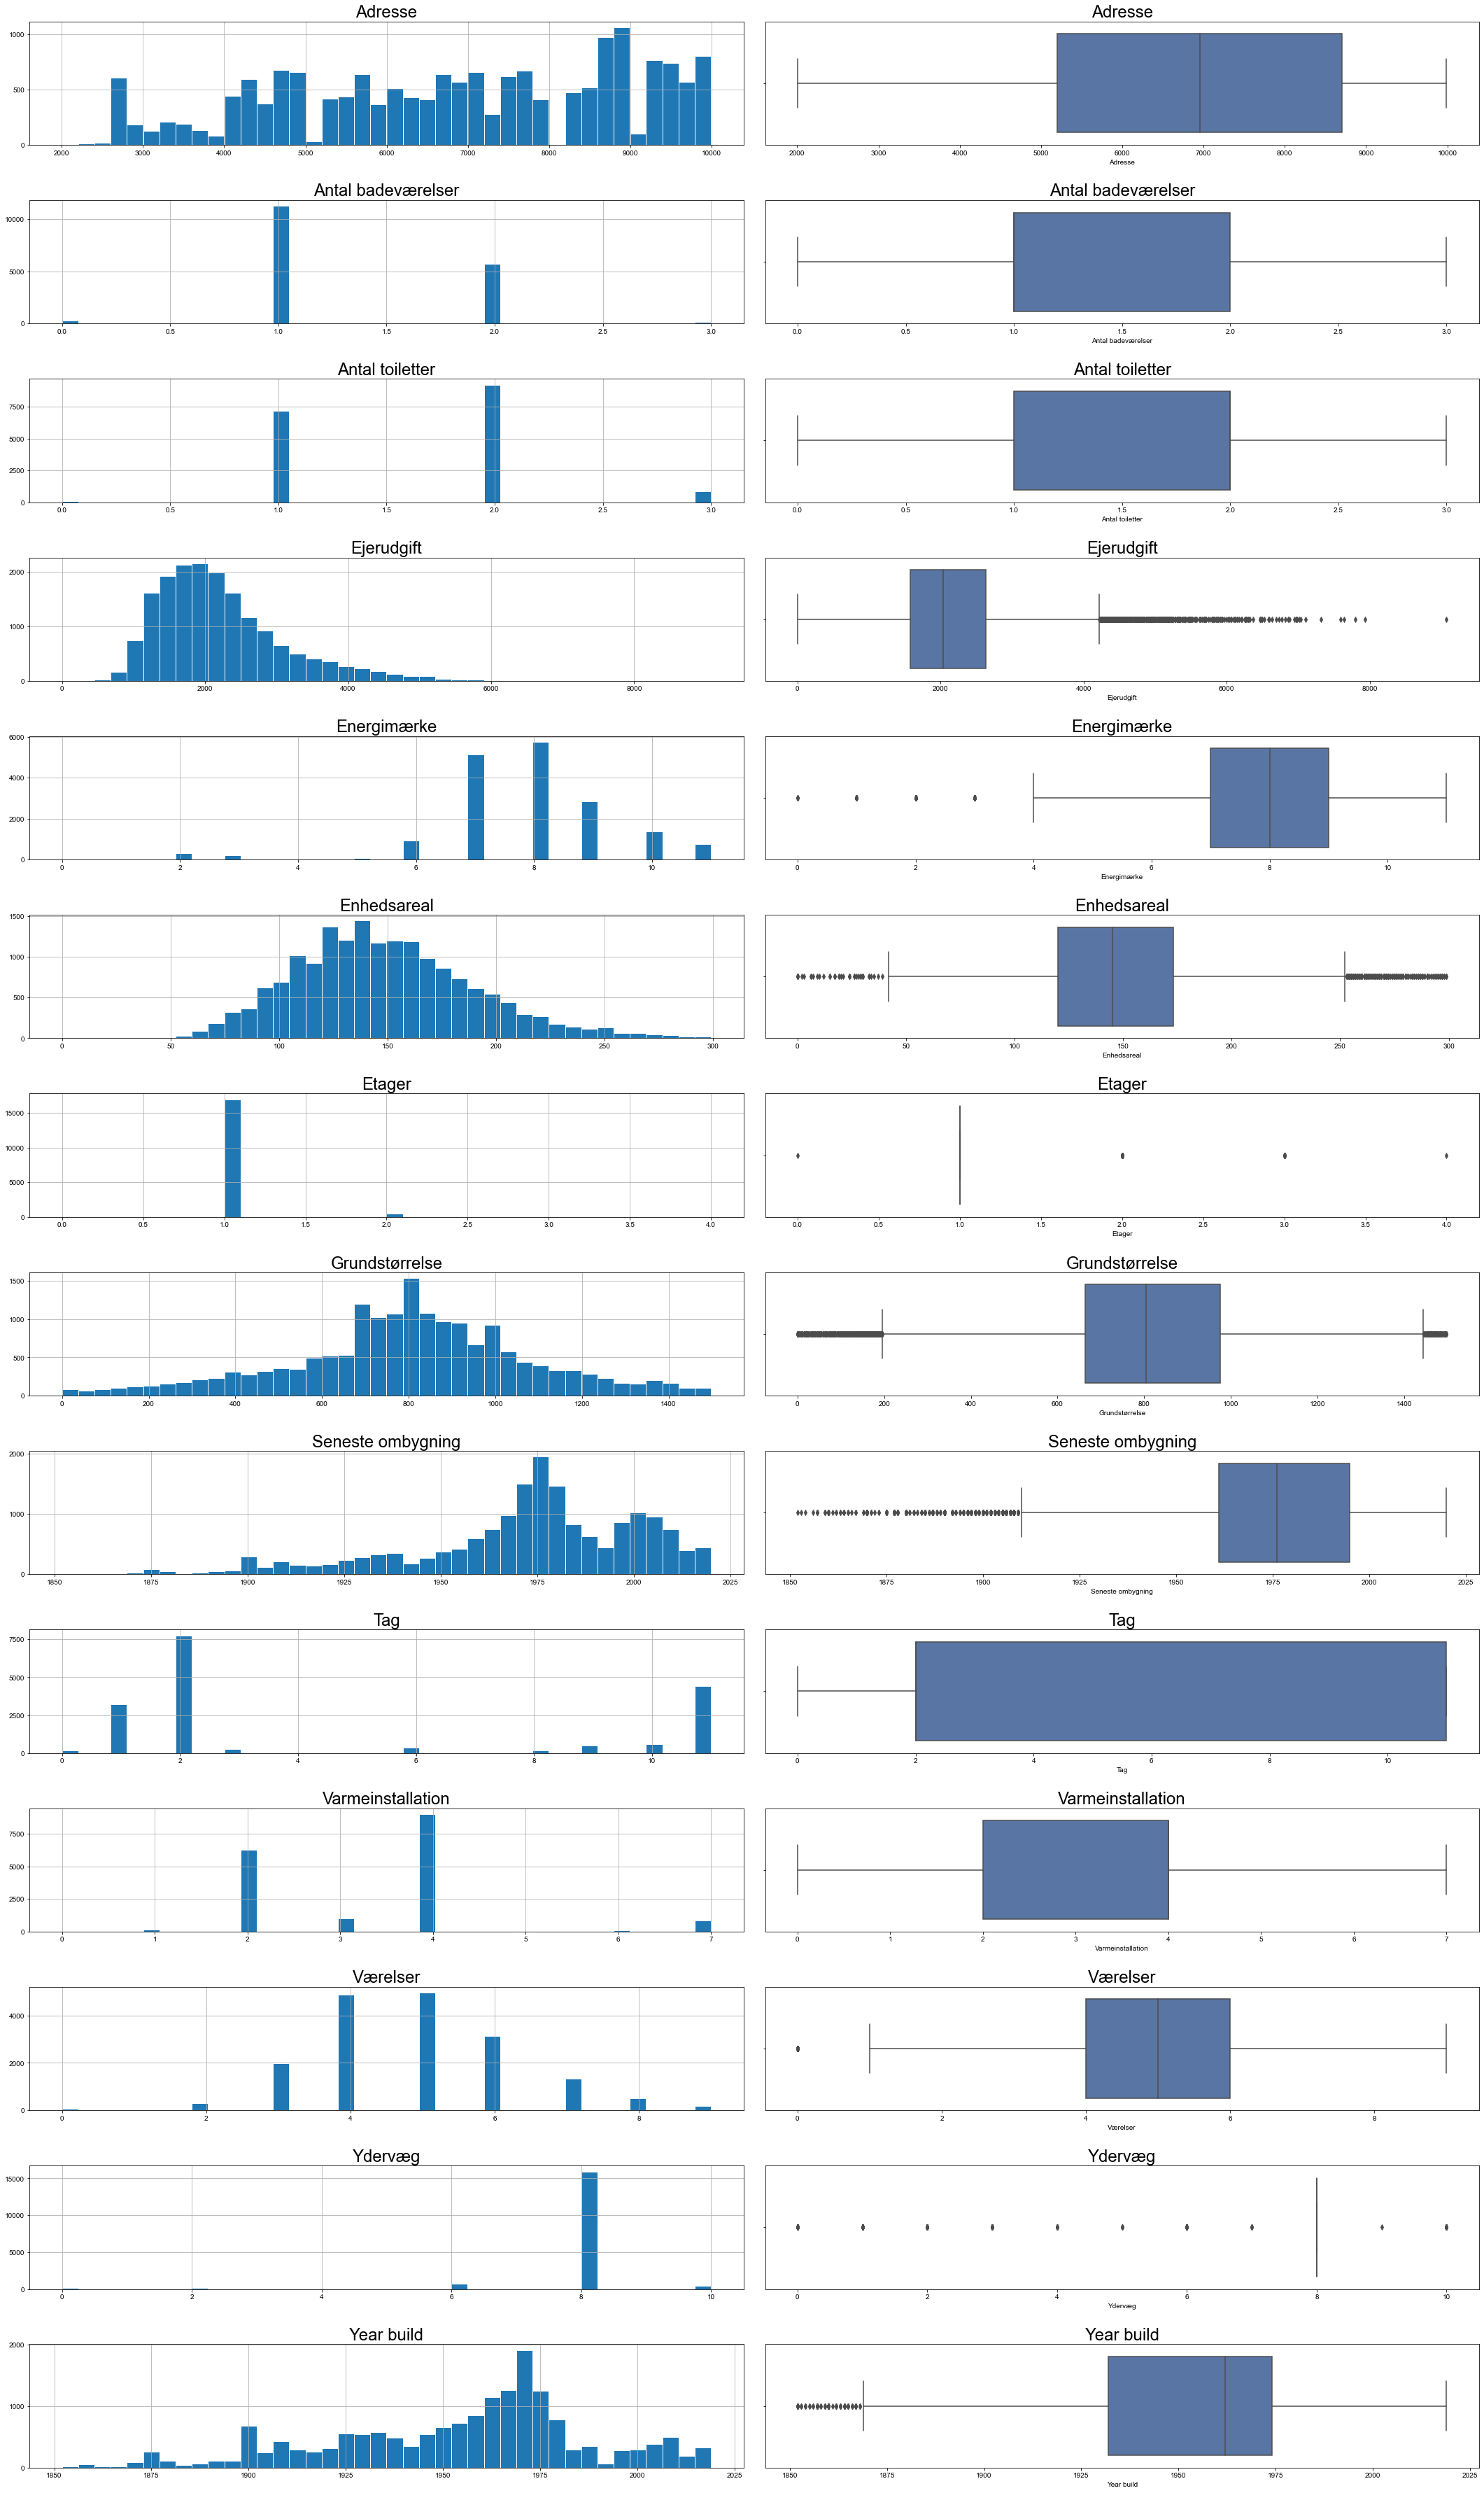

In [3]:
columns = np.setdiff1d(data.columns.to_numpy(),'Pris')
fig, axes = plt.subplots(nrows=14, ncols=2, figsize=(30,50))
sb.set(font_scale=2)

for col in enumerate(columns):
    data[col[1]].hist(ax=axes[col[0],0], bins=40);
    axes[col[0],0].set_title(col[1])
    sb.boxplot(ax=axes[col[0],1], x=data[col[1]])
    axes[col[0],1].set_title(col[1])

plt.tight_layout()

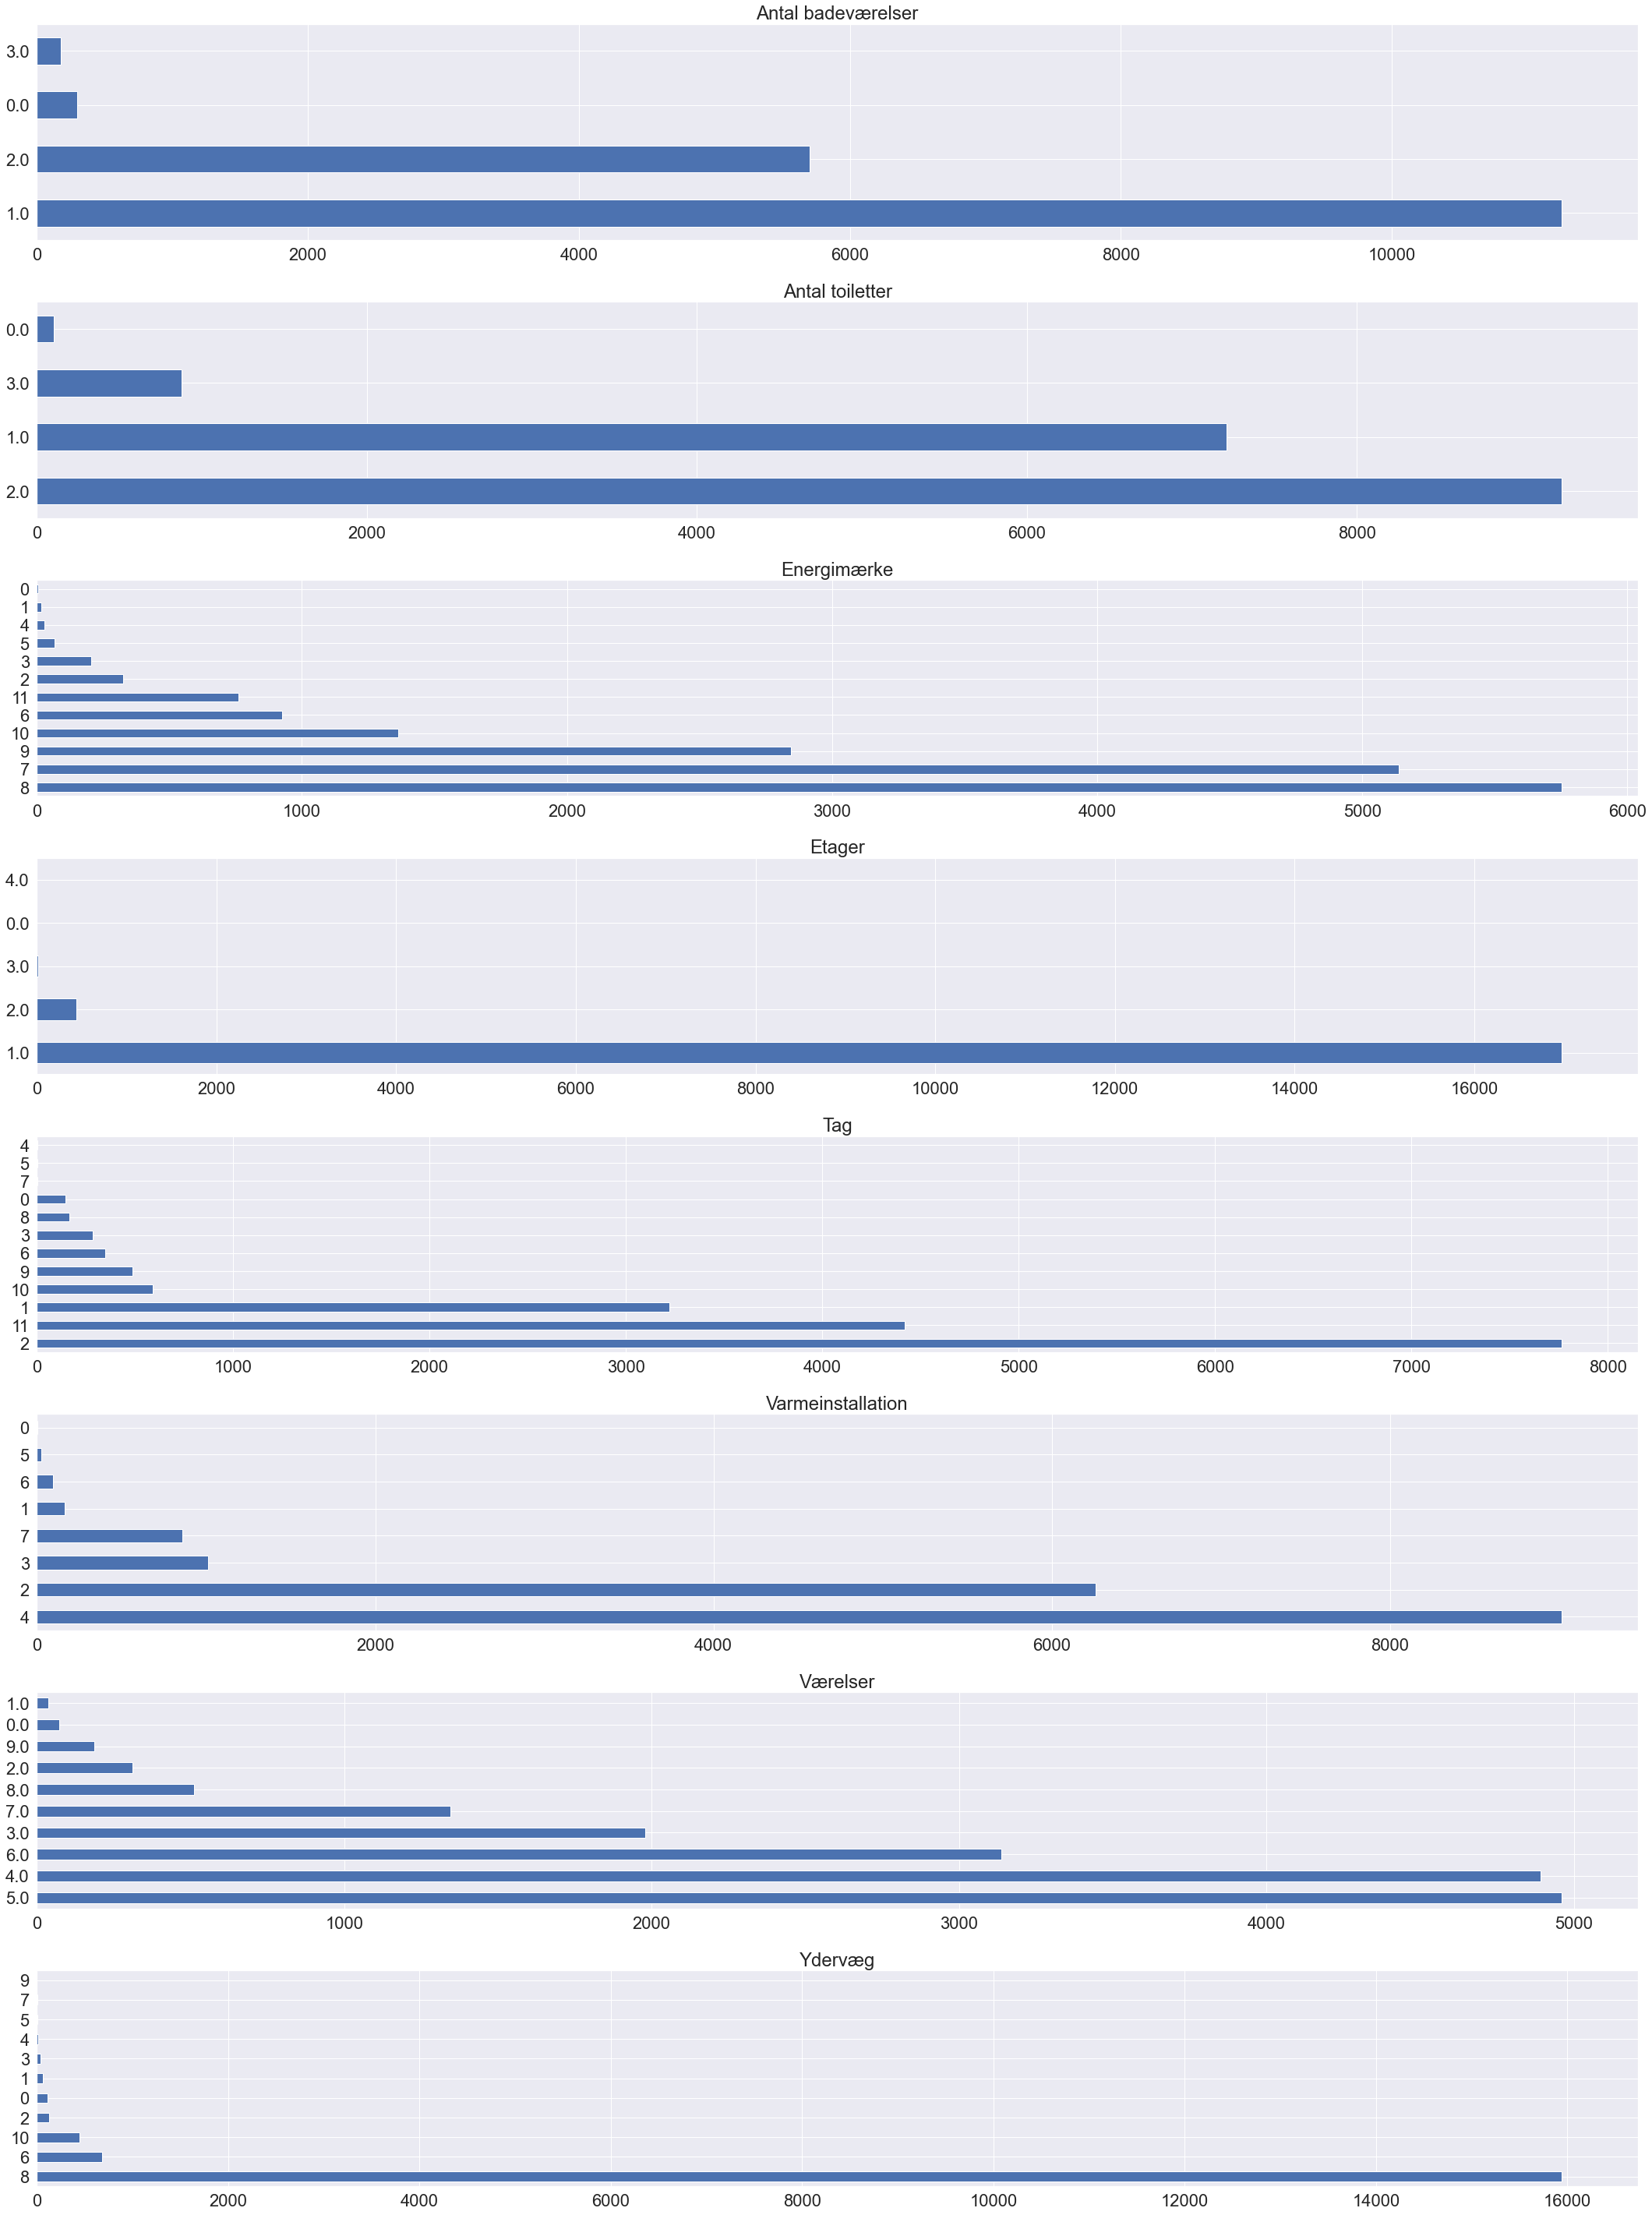

In [4]:
columns = ['Antal badeværelser', 'Antal toiletter', 'Energimærke', 'Etager', 'Tag', 'Varmeinstallation', 'Værelser', 'Ydervæg']
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(30,40))
sb.set(font_scale=2)

for col in enumerate(columns):
    pd.value_counts(data[col[1]]).plot(kind='barh',ax=axes[col[0]])
    axes[col[0]].set_title(col[1]);
    
plt.tight_layout()

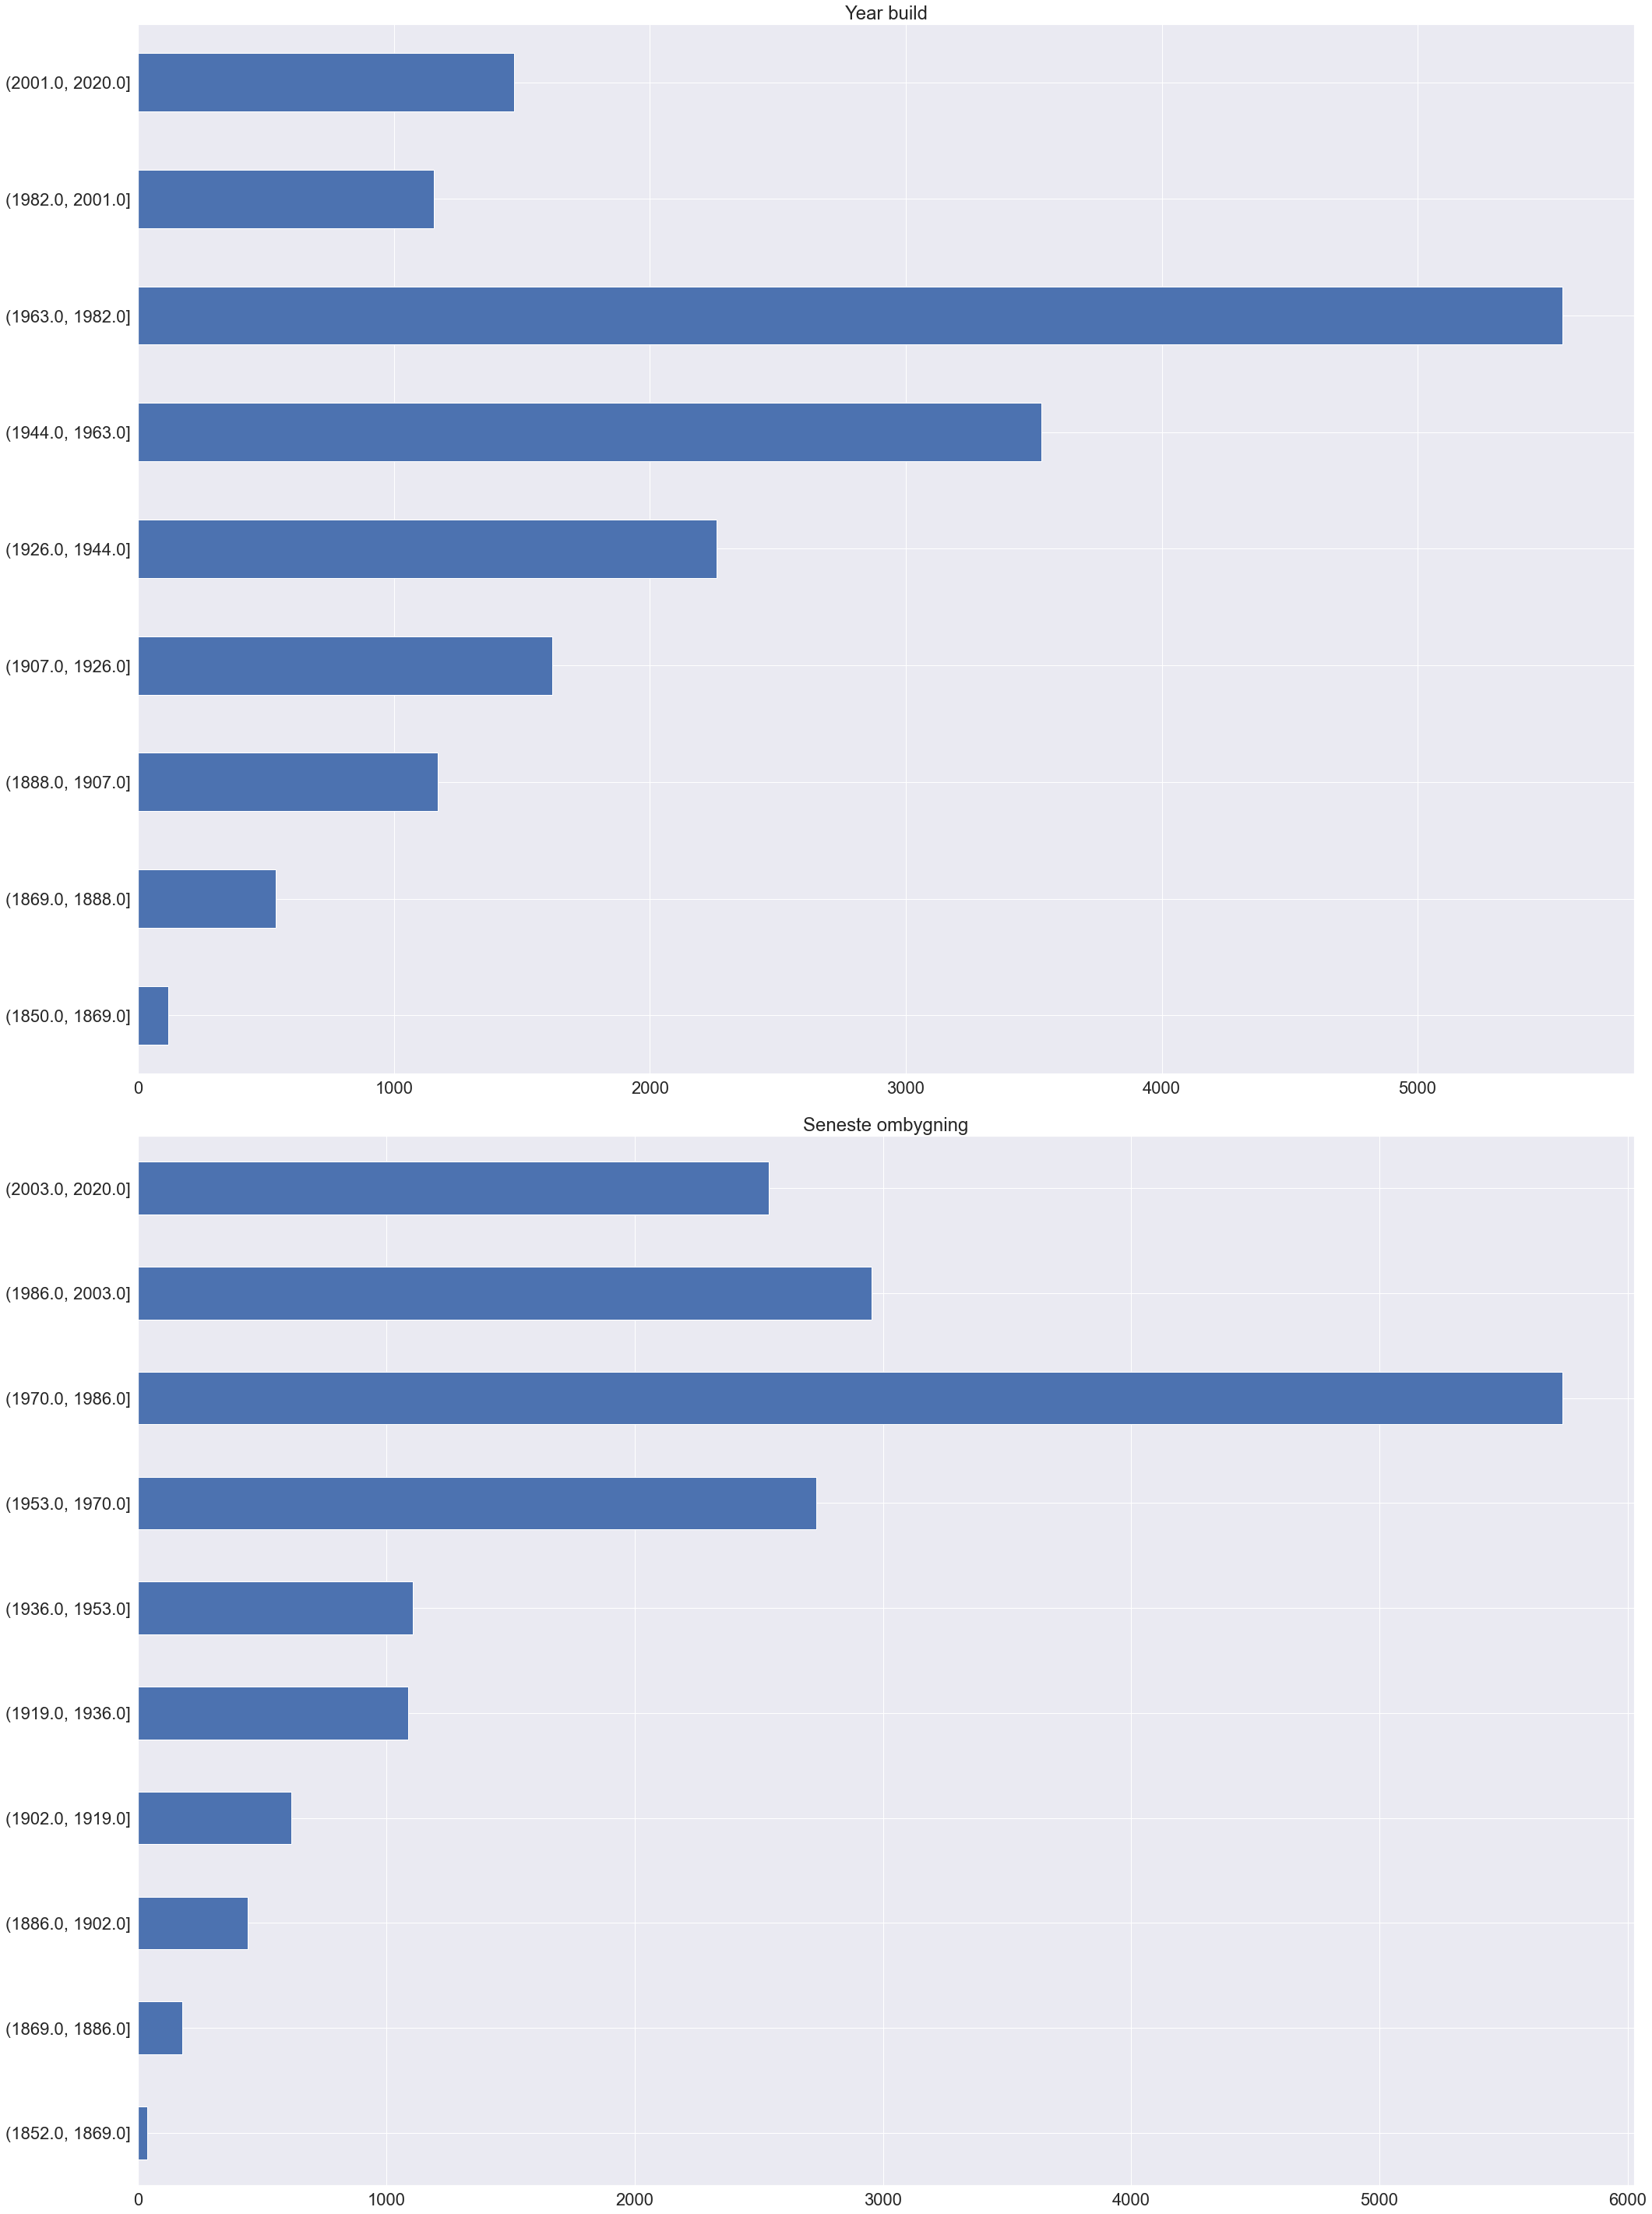

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30,40))
sb.set(font_scale=2)

bins = np.linspace(1850, 2020, 10)
pd.value_counts(pd.cut(data['Year build'], bins=bins, precision=0), sort=False).plot(kind='barh',ax=axes[0])
axes[0].set_title('Year build');

bins = np.linspace(1850, 2020, 10)
pd.value_counts(pd.cut(data['Seneste ombygning'], 10, precision=0), sort=False).plot(kind='barh',ax=axes[1])
axes[1].set_title('Seneste ombygning');



plt.tight_layout()

### Target

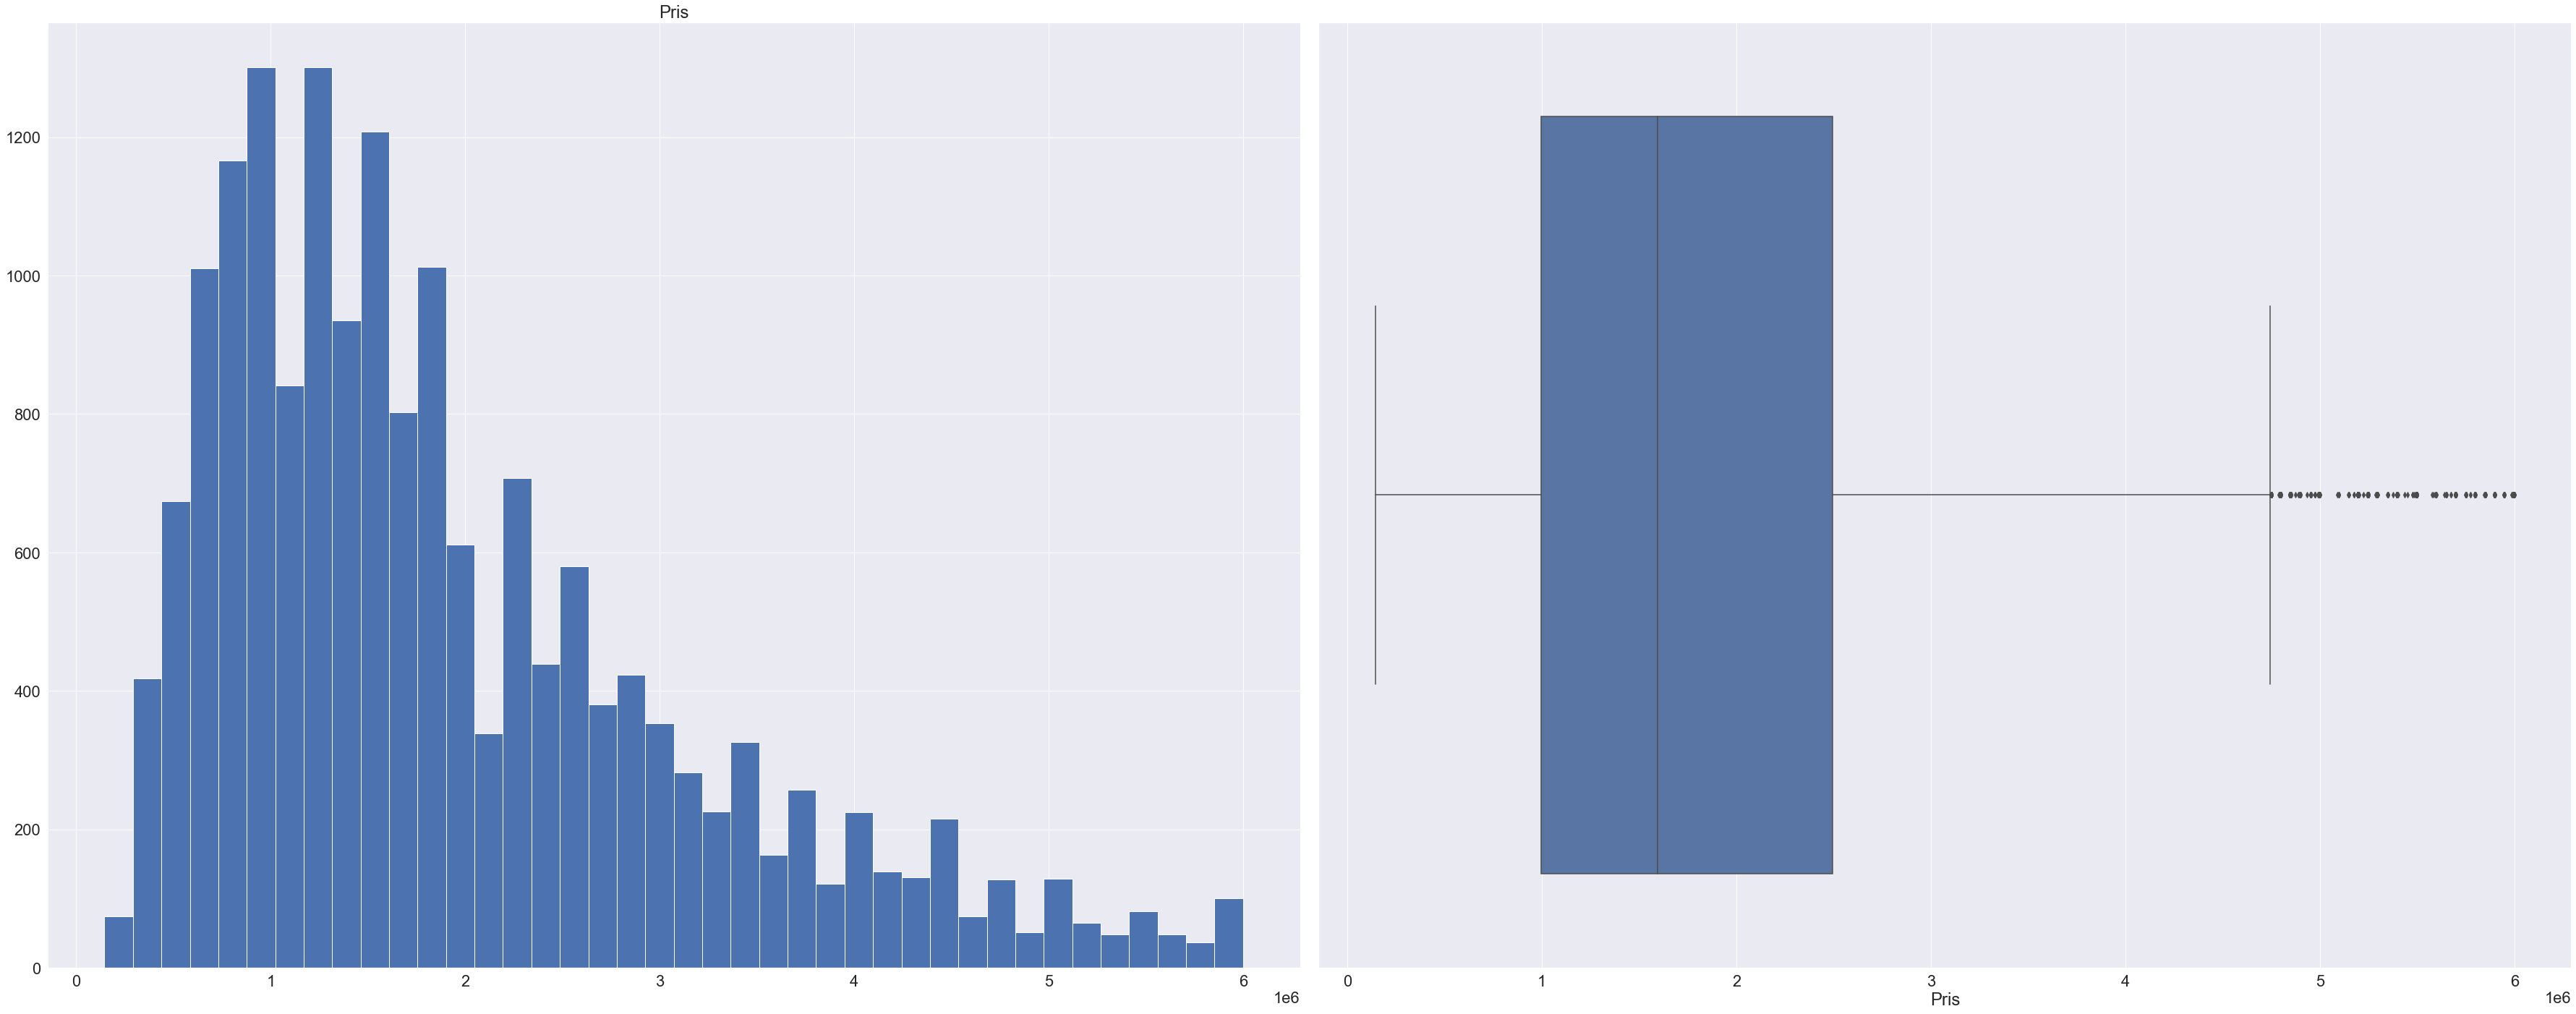

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(50,20))
sb.set(font_scale=2)

data['Pris'].hist(ax=axes[0], bins=40);
axes[0].set_title('Pris')
sb.boxplot(ax=axes[1], x=data['Pris'])

plt.tight_layout()

##### Model

In [7]:
trainModel()

Data was already cleaned
Model trained


In [8]:
testModel()

0.780238329228199

In [9]:
X_test, y_test = saveModel()

Model saved!


In [10]:
model = loadModel('./data/villa_model.pickle')
model.score(X_test, y_test)

0.780238329228199

In [16]:
X_test[:1]

Adresse  Year build  Energimærke  Ejerudgift  Enhedsareal  Værelser  \
23956     4400        1897            7        1732          138       4.0   

       Antal toiletter  Antal badeværelser  Ydervæg  Tag  Etager  \
23956              1.0                 1.0        8    2     1.0   

       Seneste ombygning  Varmeinstallation  Grundstørrelse  
23956             1978.0                  4           567.0